# Assignment 2

### Define idea and parameters of data analysis:

Idea: does the trip distance of a citibike user vary with age?

This analysis focuses on distance between start and end stations and how age impacts trip distance.


Define young riders: y >= 1980 (millenials)

Define total riders: 1951 <= x > 1980  (working population, not typically retired)

Define long distance trips: L = trips > average distance for all trips (start to end station using latitude/longitude values in decimal degrees)

### State Hypotheses:

Null Hypothesis: 

The ratio of long distance trips by young riders to all distance trips by young riders is less than or equal to the ratio of long distance trips by the rest of the population to all distance trips by the rest of the population.

$$Ly/Sy-Lx/Sx<=0$$

Alternative Hypothesis:

The ratio of long distance trips by young riders to all distance trips by young riders is greater than the ratio of long distance trips by the rest of the population to all distance trips by the rest of the population.

$$Ly/Sy-Lx/Sx>0$$

Significance level: 0.05

## Set up the work for data-driven inference based on CitiBike data.

In [4]:
#import data to workspace

#set working environment packages
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd

#opening data into this notebook
r = urllib2.urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(StringIO(r))
citibikedata = z.open('201606-citibike-tripdata.csv')
data = pd.read_csv(citibikedata)
data.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


## Begin data manipulation:

Modify and add columns to eventually calculate distance.

In [5]:
#add new columns to begin calculating distance using decimal degrees
#distance = (latitude, longitude of end station) subtracted from (latitude, longitude of start station)
import pandas as pd
data1 = pd.read_csv("201606-citibike-tripdata.csv")
data1.loc[:,"start_location"] = "(" + data1["start station latitude"].map(str) + "," + " " + data1["start station longitude"].map(str) + ")"
data1.head()

data1.loc[:,"stop_location"] = "(" + data1["end station latitude"].map(str) + "," + " " + data1["end station longitude"].map(str) + ")"
data1.loc[:,"start_location"] = data1.loc[:,"start_location"].map(eval)
data1.loc[:,"stop_location"] = data1.loc[:,"stop_location"].map(eval)
data1.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_location,stop_location
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)"
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)"
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)"
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)"
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)"


In [6]:
#find distance from decimal degree data using geopy
import geopy
from geopy.distance import vincenty
newdata = data1[data1["birth year"] > 1951]
len(newdata)

1240530

In [7]:
#create new distance column and populate it
def dist_newdata(df):
    return vincenty(df["start_location"],df["stop_location"]).miles

newdata["distance"] = newdata.apply(dist_newdata, axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
#see if the function worked properly
newdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_location,stop_location,distance
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,"(40.73401143, -74.00293877)","(40.758984814, -73.9937996864)",1.788728
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,"(40.7190095, -73.95852515)","(40.72153267, -73.95782357)",0.177958
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,"(40.76461837, -73.98789473)","(40.76344058, -73.98268129)",0.285343
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,"(40.75714758, -73.97207836)","(40.72019576, -73.98997825)",2.717342
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,"(40.72903917, -73.99404649)","(40.73454567, -73.99074142)",0.417694


In [9]:
#explore new data column
newdata["distance"].mean()

1.163136876223253

In [10]:
#visualize data, distance less than 20 miles
ddata = newdata[newdata["distance"] < 20]

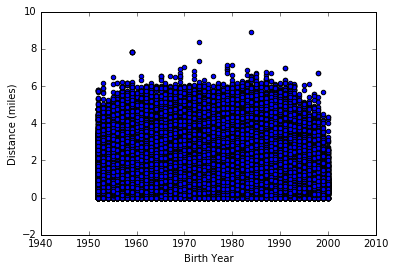

In [11]:
#plot birth year versus distance for exploration
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(ddata["birth year"], ddata["distance"])
plt.ylabel('Distance (miles)')
plt.xlabel('Birth Year')

In [12]:
#create new dataset of just 'long distance' trips greater than 3 miles from start to end station
ddata_3 = newdata[newdata["distance"] >3]

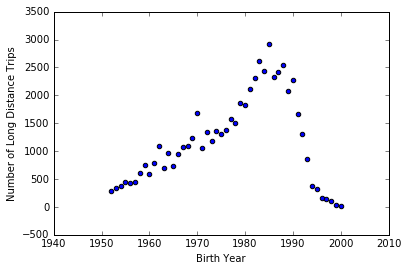

In [13]:
#group data by birth year of just ddata_3 dataset to see count distribution
count_per_birth_year = ddata_3["distance"].groupby(ddata_3["birth year"]).count()
plt.scatter(count_per_birth_year.index,count_per_birth_year.values)
plt.ylabel('Number of Long Distance Trips')
plt.xlabel('Birth Year')

In [14]:
#group data by birth year, all data 
count_per_birth_year_all = newdata["distance"].groupby(newdata["birth year"]).count()
#normalize data
count_per_birth_normalized = count_per_birth_year / count_per_birth_year_all

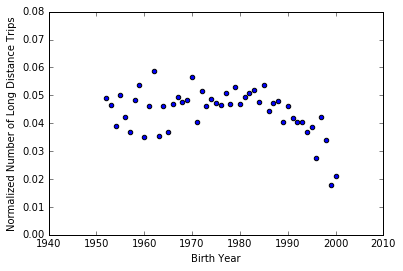

In [15]:
#plot normalized data
plt.scatter(count_per_birth_normalized.index,count_per_birth_normalized.values)
plt.ylabel('Normalized Number of Long Distance Trips')
plt.xlabel('Birth Year')

In [19]:
#subset data to remove unneeded columns for data analysis next week
subset_citibike = newdata.loc[:,["start station latitude","start station longitude","end station latitude", "end station longitude", "birth year", "distance" ]]
subset_citibike.head()

,start station latitude,start station longitude,end station latitude,end station longitude,birth year,distance
0,40.734011,-74.002939,40.758985,-73.993800,1972.0,1.788728
1,40.719009,-73.958525,40.721533,-73.957824,1967.0,0.177958
2,40.764618,-73.987895,40.763441,-73.982681,1989.0,0.285343
3,40.757148,-73.972078,40.720196,-73.989978,1991.0,2.717342
4,40.729039,-73.994046,40.734546,-73.990741,1989.0,0.417694


In [47]:
#export data to csv
subset_citibike.to_csv("citibike_clean.csv")

In [20]:
#define dataset of just millenials
mill = subset_citibike[subset_citibike["birth year"] >= 1980]
mill.head()

,start station latitude,start station longitude,end station latitude,end station longitude,birth year,distance
2,40.764618,-73.987895,40.763441,-73.982681,1989.0,0.285343
3,40.757148,-73.972078,40.720196,-73.989978,1991.0,2.717342
4,40.729039,-73.994046,40.734546,-73.990741,1989.0,0.417694
6,40.752996,-73.987216,40.714948,-74.002345,1986.0,2.742892
7,40.750200,-73.990931,40.732233,-73.988900,1986.0,1.244361


## Visualize data for next week's analysis:

Populating the interactive namespace from numpy and matplotlib


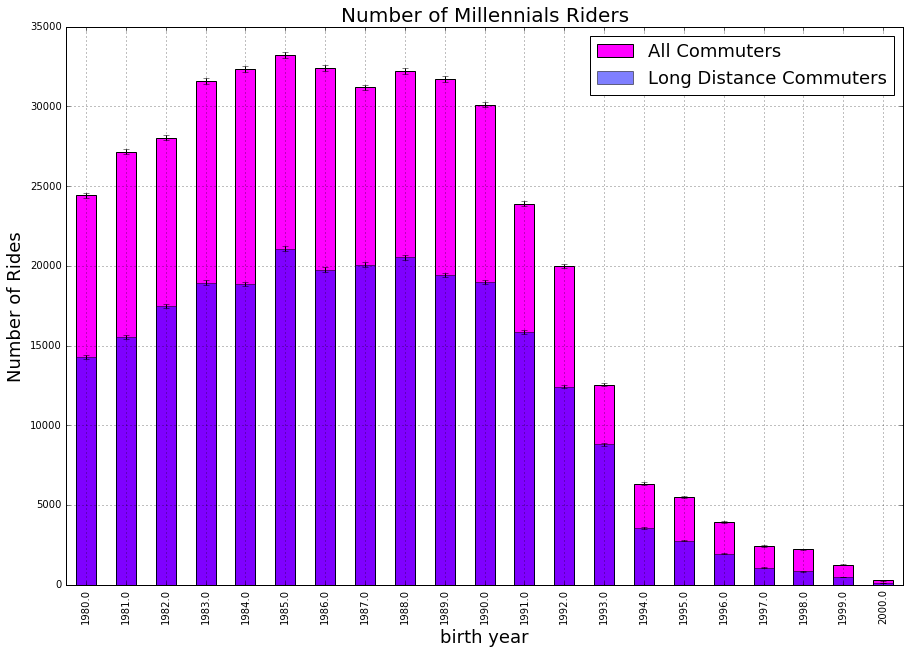

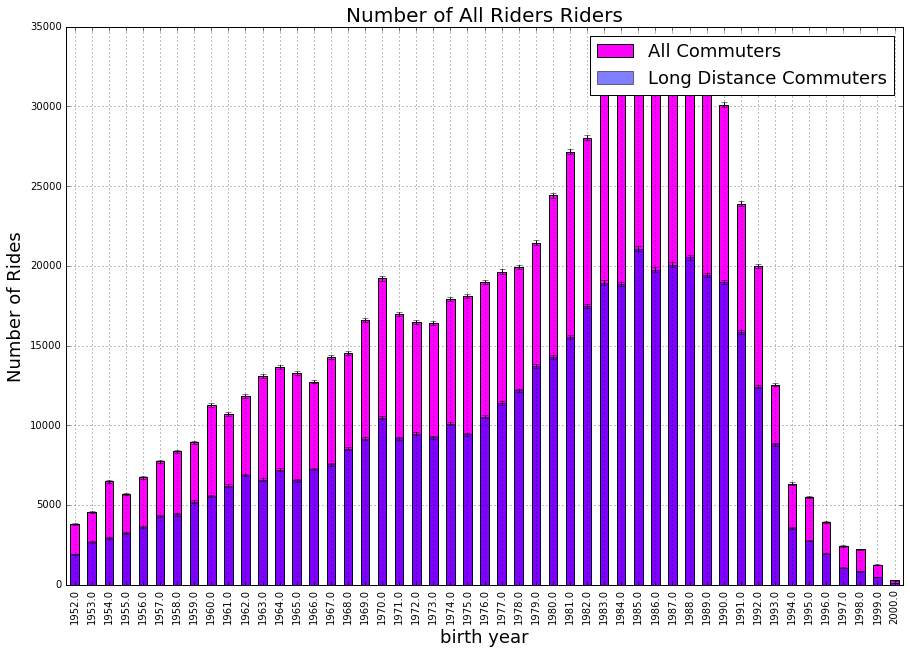

In [24]:
import numpy as np
import matplotlib.pylab as pl
%pylab inline

avg_dis = newdata.distance.mean()

def plot_vs(m,group):
    
    fig=pl.figure(figsize(15,10)).add_subplot(111)
    counts_all = m["birth year"][m.distance <= avg_dis].groupby(m["birth year"]).count()
    norm_all = 1
    error_all = np.sqrt(counts_all)
    ax=((counts_all) / norm_all).plot(kind="bar",color='magenta',  yerr=[
                ((error_all) / norm_all, (error_all) / norm_all)], label='All Commuters')


    counts_l = m["birth year"][m.distance > avg_dis].groupby(m["birth year"]).count()
    norm_l = 1
    error_l=np.sqrt(counts_l)
    ((counts_l) / norm_l).plot(kind="bar", alpha=0.5, yerr=[((error_l) / norm_l, (error_l) / norm_l)], label='Long Distance Commuters')
    ax.set_ylabel ("Number of Rides", fontsize = 18)
    ax.set_ylim([0, 35000])
    ax.set_xlabel ("birth year", fontsize = 18)
    pl.legend(['All Commuters','Long Distance Commuters'],fontsize=18)
    pl.title("Number of " + group + " Riders", fontsize = 20)
    pl.grid()
    pl.show()
    return counts_all,counts_l
m_all, m_long = plot_vs(mill,"Millennials")
o_all, o_long = plot_vs(newdata,"All Riders")

### Plot of Long Distance Trips, by group:

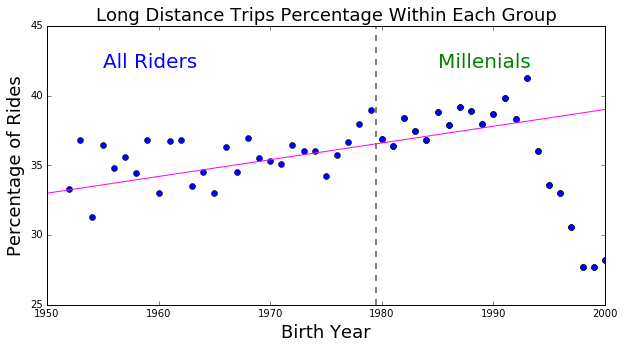

In [28]:
m_percentage = m_long/(m_long+m_all) * 100
o_percentage = o_long/(o_long+o_all) * 100

fig=pl.figure(figsize(10,5))
ax = fig.add_subplot(111)
ax.plot(m_percentage.index,m_percentage.values,'o',color = "green", alpha =0.8)
ax.plot(o_percentage.index,o_percentage.values,'o')
pl.plot([1979.5,1979.5],[25,45],'--',color = 'grey',lw=2)
pl.plot([1950,2000],[33,39],color = 'magenta')
ax.set_ylabel("Percentage of Rides", fontsize=18)
ax.set_xlabel("Birth Year", fontsize=18)

pl.text(1985,42,r'Millenials', color='green', size=20)
pl.text(1955,42,r'All Riders', color='blue', size=20)
pl.title("Long Distance Trips Percentage Within Each Group", size=18)
pl.show()